# DLM with regressors

In [7]:
from utilities.std_imports import *
import pydlm.plot.dlmPlot as dlmPlot
from pydlm import dlm, trend, seasonality
from pydlm import dynamic

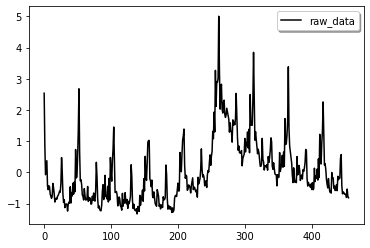

In [5]:
data_file = open(ts_path + 'unemploy.csv', 'r')

variables = data_file.readline().strip().split(',')
data_map = {}
for var in variables:
    data_map[var] = []

for line in data_file:
    for i, data_piece in enumerate(line.strip().split(',')):
        data_map[variables[i]].append(float(data_piece))

# Extract and store the data.
time_series = data_map[variables[0]]
features = [[data_map[variables[j]][i] for j in range(1, len(variables)) ] for i in range(len(time_series))]

dlmPlot.plotData(range(len(time_series)), time_series, showDataPoint=False, label='raw_data')
plt.legend(loc='best', shadow=True)
plt.show()

### Build a simple model

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


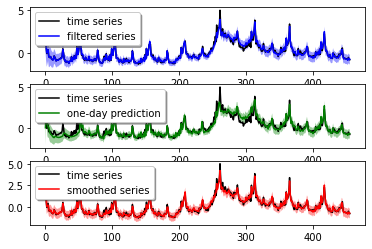

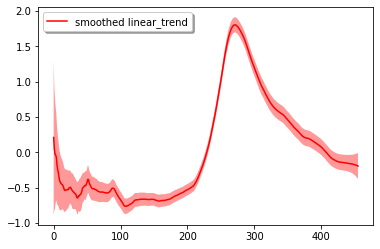

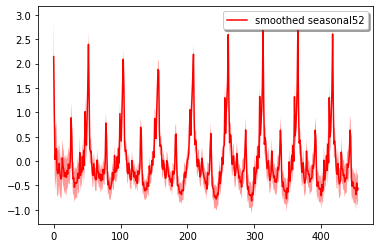

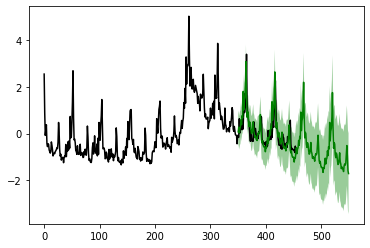

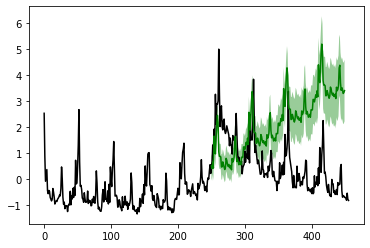

In [6]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)

simple_dlm = dlm(time_series) + linear_trend + seasonal52
simple_dlm.fit()

# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()
# Plot each component (attribution)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')
# Plot the prediction give the first 350 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(N=200, date=350)
# Plot the prediction give the first 250 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(N=200, date=250)

### Build a dynamic regression model

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


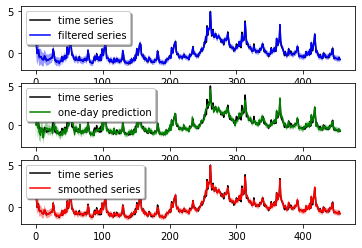

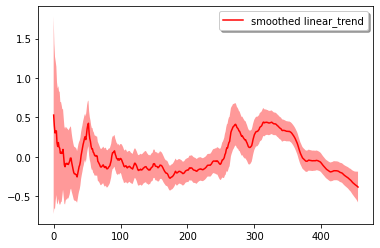

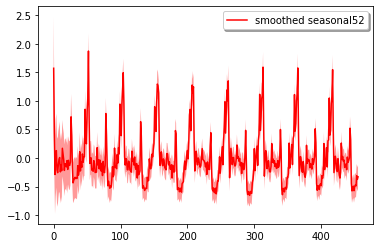

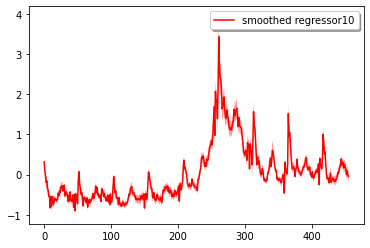

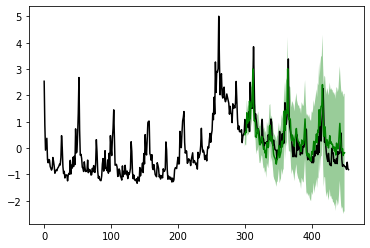

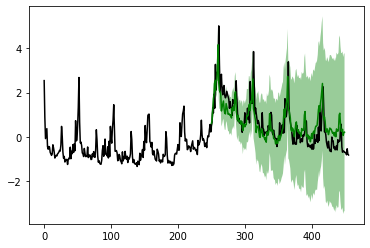

In [8]:
regressor10 = dynamic(features=features, discount=1.0, name='regressor10', w=10)
drm = dlm(time_series) + linear_trend + seasonal52 + regressor10
drm.fit()

# Plot the fitted results
drm.turnOff('data points')
drm.plot()
# Plot each component (attribution)
drm.turnOff('predict plot')
drm.turnOff('filtered plot')
drm.plot('linear_trend')
drm.plot('seasonal52')
drm.plot('regressor10')
# Plot the prediction give the first 300 weeks and forcast the next 150 weeks.
drm.plotPredictN(N=150, date=300)
# Plot the prediction give the first 250 weeks and forcast the next 200 weeks.
drm.plotPredictN(N=200, date=250)

### Credits & Links

https://github.com/wwrechard/pydlm